#Programação para Ciência de Dados

##Alunos:
**Gian Giovanni Rodrigues Da Silva**

**Jessyca Jordanna Barroso De Moraes**


#O Dataset

In [1]:
#Importa Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset 
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

dados-curso-completo.csv  ...                  hashtags
0            2020-03-23 18:51:14  ...                        []
1            2020-03-18 03:18:14  ...                        []
2            2020-03-29 12:09:27  ...                        []
3            2020-04-01 21:11:07  ...                        []
4            2020-03-19 17:49:40  ...                        []
...                          ...  ...                       ...
1658821      2020-05-12 13:02:34  ...                        []
1658822      2020-03-19 18:16:30  ...           ['CORONAVIRUS']
1658823      2020-04-07 18:14:45  ...  ['BolsonaroTemRazaoSim']
1658824      2020-06-02 16:04:51  ...                        []
1658825                      NaN  ...                       NaN

[1658826 rows x 13 columns]

#Visão Geral dos Dados

##Sem processamento

###Relatório

In [3]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 43.5MB 138.1MB/s
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 604kB 18.4MB/s 
     |████████████████████████████████| 3.1MB 35.6MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 296kB 44.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=7beb5b00a4c5902b146b775df47e0f5dee72c27a36fc68f1a7f7fa85b184c0cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-nfqf5yvb/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=b55ba48d6f22256e0328a1139775758fdae8197006b61f9b4503bee29d5e7e27
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=29

In [4]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

In [5]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_covid, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report_original.html")

In [7]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Análises

O dataset:

*   Número de Variáveis - 13;
  *   9 Categóricas;
  *   4 Numéricas.
*   Número de Observações - 1658826.

De acordo com o relatório acima, **37.3%** do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Latitude - 99.5%;
*   Longitude - 99.5%
*   Lugar - 95.5%;
*   País - 95.5%;
*   Sigla - 95.5%.

Dois dos usuários que mais possuem comentários no dataset são canais de notícia de Portugal, inclusive uma delas aparece duas vezes por terem nome de usuários diferentes.

*   Agência Lusa - 1404;
*   tvi24 Últimas (1181) e tvi24 (1178) - 2359.

A coluna retweet tem valores que variam de 0 (1314424	ou 79.2%) a 1139763 (1 ou < 0.1%), fazendo com que os dados tenham uma assimetria positiva ou à direita, ou seja, maior que 0 (75.73862462). Esse comportamento pode ser melhor observado no gráfico abaixo.















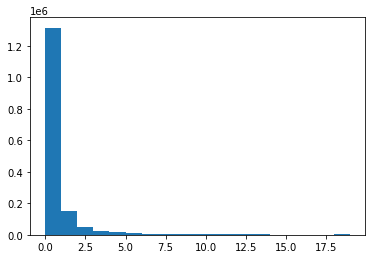

In [8]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

Os dados da coluna seguidores apresentam o mesmo comportamento descrito anteriormente. O usuário com o maior número de seguidores é o Donald Trump.

In [9]:
df_covid.loc[df_covid.seguidores == 84241250]

dados-curso-completo.csv          usuario  ... longitude hashtags
788393      2020-05-23 23:08:17  Donald J. Trump  ...       NaN       []

[1 rows x 13 columns]

A maioria dos textos estão no idioma português (95.7%), porém o relatório mostra que apenas 4.3% dos tweets são do Brasil e de Portugal. Outros países que tem como um de seus idiomas o português, correspondem a menos de 1% do dataset. Esse desencontro entre as informações se deve provavelmente aos dados faltantes na coluna País.

##Com processamento

In [10]:
#Selecionando somente texto com perguntas
df_processado = df_covid[df_covid['texto'].str.contains('\?', na = False)]
pd.set_option('display.max_info_columns', 5000)
df_processado.reset_index(inplace = True, drop = True)
df_processado

dados-curso-completo.csv  ...                              hashtags
0           2020-03-23 18:51:14  ...                                    []
1           2020-04-01 21:11:07  ...                                    []
2           2020-06-25 11:09:19  ...                                    []
3           2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
4           2020-03-30 00:43:36  ...                                    []
...                         ...  ...                                   ...
172496      2020-03-24 23:50:14  ...                                    []
172497      2020-03-26 21:43:24  ...                                    []
172498      2020-05-25 22:53:13  ...                                    []
172499      2020-03-13 17:26:18  ...                                    []
172500      2020-05-12 13:02:34  ...                                    []

[172501 rows x 13 columns]

In [13]:
#Separando as perguntas e colocando-as com os seus dados em listas
datas = []
usuarios = []
textos = []
retweets = []
num_seg = []
lugares = []
paises = []

import re
for index, row in df_processado.iterrows():
#for x in df_processado['texto']:
  if row['texto'].find(" ?"):
    row['texto'] = row['texto'].replace(" ?","?")
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      datas.append(row['dados-curso-completo.csv'])
      usuarios.append(row['usuario'])
      textos.append(i)
      retweets.append(row['retweet'])
      num_seg.append(row['seguidores'])
      lugares.append(row['lugar'])
      paises.append(row['pais'])

In [14]:
#Criando dataframe com os dados processados a partir de um dicionário de listas
dados = {'dados-curso-completo.csv': datas, 'usuario': usuarios, 'texto': textos, 'retweet': retweets, 'seguidores': num_seg, 'lugar': lugares, 'pais': paises}
df_duvidasDB = pd.DataFrame(dados)
df_duvidasDB

dados-curso-completo.csv                   usuario  ... lugar  pais
0           2020-03-23 18:51:14                  Gaboardi  ...   NaN   NaN
1           2020-04-01 21:11:07                         🚩  ...   NaN   NaN
2           2020-06-25 11:09:19            Andreia Peraro  ...   NaN   NaN
3           2020-04-06 15:44:36         Diorgenes Pandini  ...   NaN   NaN
4           2020-03-30 00:43:36             Valnei do Val  ...   NaN   NaN
...                         ...                       ...  ...   ...   ...
196586      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196587      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196588      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196589      2020-03-13 17:26:18                     broca  ...   NaN   NaN
196590      2020-05-12 13:02:34                 Renato 🇧🇷  ...   NaN   NaN

[196591 rows x 7 columns]

In [15]:
#Transformando a coluna com Data e Hora para datetime
df_duvidasDB['dados-curso-completo.csv'] = pd.to_datetime(df_duvidasDB['dados-curso-completo.csv'])

In [16]:
#Inserindo dia da semana no dataframe
import datetime
from datetime import datetime as dt

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

df_duvidasDB['dia_da_semana'] = df_duvidasDB['dados-curso-completo.csv']
df_duvidasDB['dia_da_semana'] = df_duvidasDB['dia_da_semana'].apply(
    lambda x: weekday_name[dt.weekday(x)]
)

df_duvidasDB

In [18]:
#Armazenando data e hora em colunas separadas
# Coluna 'Data'
df_duvidasDB['data'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%d-%m-%Y')
# Coluna 'Hora'
df_duvidasDB['hora'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%H')

In [19]:
#Removendo coluna com data e hora juntos
df_duvidasDB.drop('dados-curso-completo.csv', axis=1)

usuario  ... hora
0                       Gaboardi  ...   18
1                              🚩  ...   21
2                 Andreia Peraro  ...   11
3              Diorgenes Pandini  ...   15
4                  Valnei do Val  ...   00
...                          ...  ...  ...
196586  O que houve com a couve?  ...   22
196587  O que houve com a couve?  ...   22
196588  O que houve com a couve?  ...   22
196589                     broca  ...   17
196590                 Renato 🇧🇷  ...   13

[196591 rows x 9 columns]

In [20]:
#Reorganizando as colunas do dataframe
df_duvidasDB = df_duvidasDB[['data', 'dia_da_semana', 'hora', 'usuario', 'texto', 'retweet', 'seguidores', 'lugar', 'pais']]

In [22]:
#Executando o profile

#Desabilita os métodos considerados mais custosos
#profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)

profile = ProfileReport(df_duvidasDB, title='Relatório - Pandas Profiling', html={'style': {'full_width': True}}, plot={'histogram': {'bins': 10}})
profile

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report_processado.html")

In [24]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [25]:
#caminho_do_arquivo = '\csv_uea\sentenca_tweet.csv'
#texto_bruto.to_csv(caminho_do_arquivo, index=False)
#print(caminho_do_arquivo)

#Temas Discutidos

###Categorização

In [26]:
#Criando lista com os temas
list_doencas = ['corona','virus','covid','Sars-Cov-2']
list_medicamentos = ['Azitromicina','AAS','Buscopan','Cloroquina','Hidroxicloroquina','Remdersivir','Dexametasona','Lopinavir','Ivermectina','Nitazoxanida','Plasma','chá','Heparina','limão','ozônio','Corticoide','Ritonavir']
list_organizacoes = ['OMS','Globo','Record','STF', 'Congresso','Senado','Camara','igreja','SUS','hospita','FDA','butatan','fvs','Oxford','MS','Ministério da Saúde','SBPT','AMIB']
list_pessoas = ['Bolsonaro','Trump','Lula','Mandetta','Mandeta','Draúzio','Wilson Lima','Witzel','Dória','Crivela','Arthur Neto','Pazuello','Boris','Johnson','Macron','Osmar Terra','Nelson Teich']

In [27]:
#Classificando as perguntas
for i in range(len(list_doencas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_doencas[i], flags=re.I, regex=True),'doencas'] = 'sim'

for i in range(len(list_medicamentos)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_medicamentos[i], flags=re.I, regex=True),'medicamentos'] = 'sim'

for i in range(len(list_organizacoes)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_organizacoes[i], flags=re.I, regex=True),'organizacoes'] = 'sim'

for i in range(len(list_pessoas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_pessoas[i], flags = re.I, regex = True),'pessoas'] = 'sim'

In [46]:
df_duvidasDB[df_duvidasDB['data'] == '04-02-2020']

data dia_da_semana hora  ... medicamentos organizacoes  pessoas
41      04-02-2020         Terca   17  ...          NaN          NaN      NaN
288     04-02-2020         Terca   21  ...          NaN          NaN      NaN
301     04-02-2020         Terca   02  ...          NaN          NaN      NaN
474     04-02-2020         Terca   12  ...          NaN          NaN      NaN
550     04-02-2020         Terca   01  ...          NaN          NaN      NaN
...            ...           ...  ...  ...          ...          ...      ...
195503  04-02-2020         Terca   09  ...          NaN          sim      NaN
195649  04-02-2020         Terca   20  ...          NaN          NaN      NaN
196061  04-02-2020         Terca   15  ...          NaN          NaN      NaN
196318  04-02-2020         Terca   11  ...          NaN          NaN      NaN
196578  04-02-2020         Terca   21  ...          NaN          NaN      NaN

[1104 rows x 13 columns]

In [29]:
#Quantidade de perguntas relacionadas a cada tema por dia da semana
perg_doencas = df_duvidasDB['dia_da_semana'][df_duvidasDB['doencas'] == 'sim']
perg_medicamentos = df_duvidasDB['dia_da_semana'][df_duvidasDB['medicamentos'] == 'sim']
perg_organizacoes = df_duvidasDB['dia_da_semana'][df_duvidasDB['organizacoes'] == 'sim']
perg_pessoas = df_duvidasDB['dia_da_semana'][df_duvidasDB['pessoas'] == 'sim']
perg_doencas.value_counts()

Quarta     9792
Terca      9620
Quinta     9602
Sexta      6386
Segunda    6265
Sabado     6044
Domingo    5420
Name: dia_da_semana, dtype: int64

In [30]:
#Quantidade de perguntas relacionadas a cada tema por dia da semana, na ordem
quantidades = df_duvidasDB.groupby('dia_da_semana')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidades['dia_da_semana'].map(mapping)

quantidades = quantidades.iloc[key.argsort()].set_index('dia_da_semana')
quantidades

doencas  medicamentos  organizacoes  pessoas
dia_da_semana                                              
Segunda           6265          2060          1116     1692
Terca             9620          5295          1601     3094
Quarta            9792          3222          1436     2205
Quinta            9602          2339          1433     2396
Sexta             6386          2800          1000     1357
Sabado            6044          1666           781     1269
Domingo           5420          1580           735     1153

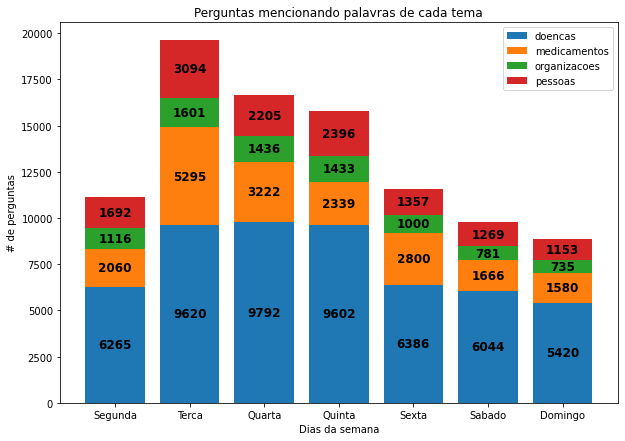

In [35]:
#Gráfico da quantidade de perguntas relacionadas a cada tema por dia da semana
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

doencas = [6265, 9620, 9792, 9602, 6386, 6044, 5420]
medicamentos = [2060, 5295, 3222, 2339, 2800, 1666, 1580]
organizacoes = [1116, 1601, 1436, 1433, 1000, 781, 735]
pessoas = [1692, 3094, 2205, 2396, 1357, 1269, 1153]

ax1 = ax.bar(x = weekday_name, height = doencas, label = 'doencas')
ax2 = ax.bar(x = weekday_name, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = weekday_name, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = weekday_name, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., '%d' % h4, ha = 'center', va = 'center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

Em 4 de fevereiro (terça-feira) o presidente decretou estado de emergência para conter o novo coronavírus no Brasil.

Em 25 de fevereiro de 2020  (terça-feira) , o Hospital Israelita Albert Einstein registrou a notificação daquele que, no dia seguinte, pelo Ministério da Saúde, seria confirmado como o primeiro caso de COVID-19 no Brasil

Em 17 de março de 2020 (terça-feira), na manhã, o Estado de São Paulo confirmou a primeira morte no Brasil, de um homem de 62 anos que estava internado em um hospital particular.

No dia 5 de maio, o Brasil registrou 600 mortes em 24 horas. Foi o maior número de mortes em um dia desde o início da pandemia.

#Visão Temporal

In [40]:
#Quantidade de perguntas por dia da semana
df_duvidasDB['dia_da_semana'].value_counts()

Terca      39416
Quarta     34264
Quinta     32583
Segunda    28650
Sexta      23407
Domingo    19341
Sabado     18930
Name: dia_da_semana, dtype: int64

In [41]:
#Quantidade de perguntas por dia da semana, na ordem
quantidade = df_duvidasDB['dia_da_semana'].value_counts().reset_index()
quantidade.columns = ['dia_da_semana', 'quantidade']

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidade['dia_da_semana'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('dia_da_semana')
quantidade

quantidade
dia_da_semana            
Segunda             28650
Terca               39416
Quarta              34264
Quinta              32583
Sexta               23407
Sabado              18930
Domingo             19341

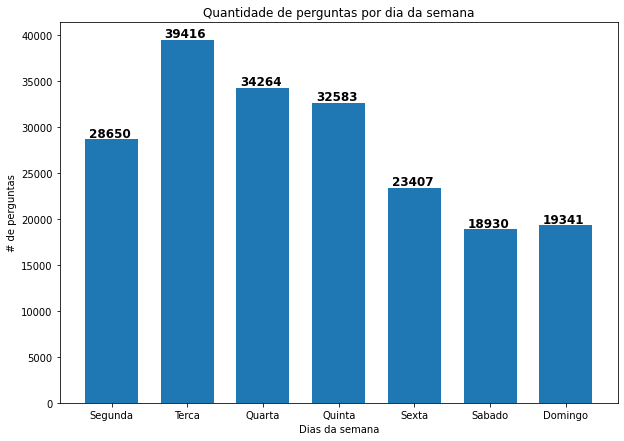

In [42]:
#Gráfico da quantidade de perguntas por dia da semana
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

dados = [28650, 39416, 34264, 32583, 23407, 18930, 19341]

ax.bar(x = weekday_name, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por dia da semana')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
    plt.text(x = (index - 0.30), y = (data * 1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

Em 4 de fevereiro (terça-feira) o presidente decretou estado de emergência para conter o novo coronavírus no Brasil.

Em 25 de fevereiro de 2020  (terça-feira) , o Hospital Israelita Albert Einstein registrou a notificação daquele que, no dia seguinte, pelo Ministério da Saúde, seria confirmado como o primeiro caso de COVID-19 no Brasil

Em 17 de março de 2020 (terça-feira), na manhã, o Estado de São Paulo confirmou a primeira morte no Brasil, de um homem de 62 anos que estava internado em um hospital particular.

https://g1.globo.com/politica/noticia/2020/06/06/apos-reduzir-boletim-governo-bolsonaro-retira-dados-acumulados-da-covid-19-de-site-oficial.ghtml

In [43]:
df_duvidasDB['hora'].value_counts()

23    27870
22    18224
21    16464
20    15972
19    14408
18    12534
17    11810
16    11198
15     9486
14     7917
13     7464
00     6045
12     5914
01     5661
02     4915
11     4796
03     4107
10     2936
04     2512
05     1753
09     1629
06     1050
08      999
07      927
Name: hora, dtype: int64

In [44]:
#Quantidade de perguntas por hora, nessa ordem
quantidade = df_duvidasDB['hora'].value_counts().reset_index()
quantidade.columns = ['hora', 'quantidade']

horario = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

mapping = {hour: i for i, hour in enumerate(horario)}
key = quantidade['hora'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('hora')
quantidade

quantidade
hora            
00          6045
01          5661
02          4915
03          4107
04          2512
05          1753
06          1050
07           927
08           999
09          1629
10          2936
11          4796
12          5914
13          7464
14          7917
15          9486
16         11198
17         11810
18         12534
19         14408
20         15972
21         16464
22         18224
23         27870

https://g1.globo.com/politica/noticia/2020/06/06/apos-reduzir-boletim-governo-bolsonaro-retira-dados-acumulados-da-covid-19-de-site-oficial.ghtml

https://g1.globo.com/politica/noticia/2020/06/06/bolsonaro-confirma-mudanca-em-divulgacao-de-boletim-do-coronavirus-a-partir-das-22h.ghtml

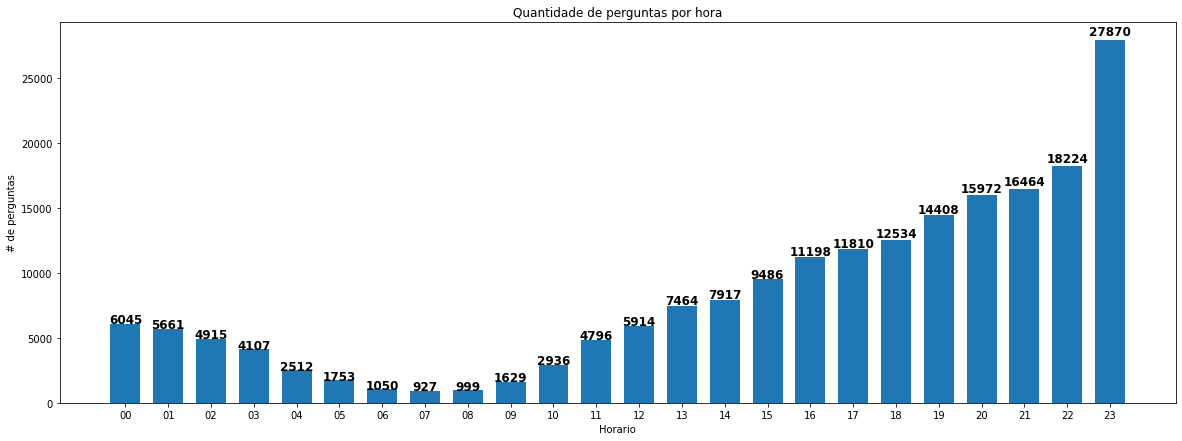

In [47]:
#Quantidade de perguntas por hora
fig = plt.figure(figsize=(20, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

dados = [6045, 5661, 4915, 4107, 2512, 1753, 1050, 927, 999, 1629, 2936, 4796, 5914, 7464, 7917, 9486, 11198, 11810, 12534, 14408, 15972, 16464, 18224, 27870]

ax.bar(x = horario, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por hora')
plt.xlabel('Horario')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
  plt.text(x = index, y = (data * 1.015), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

In [48]:
#fig = plt.figure(figsize=(20, 7), facecolor='w')
#df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['texto'].count().plot(kind='bar')
#df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['texto'].count()

AttributeError: ignored

<Figure size 1440x504 with 0 Axes>

In [49]:
fgvdfgbghbgffg

NameError: ignored

In [50]:
#df_duvidasDB['data'] = df_duvidasDB['data'].astype('datetime64')
#df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['pais'].value_counts().plot(kind='bar')
#df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['pais'].value_counts()

In [51]:
df_duvidasDB["data"] = pd.to_datetime(df_duvidasDB["data"])

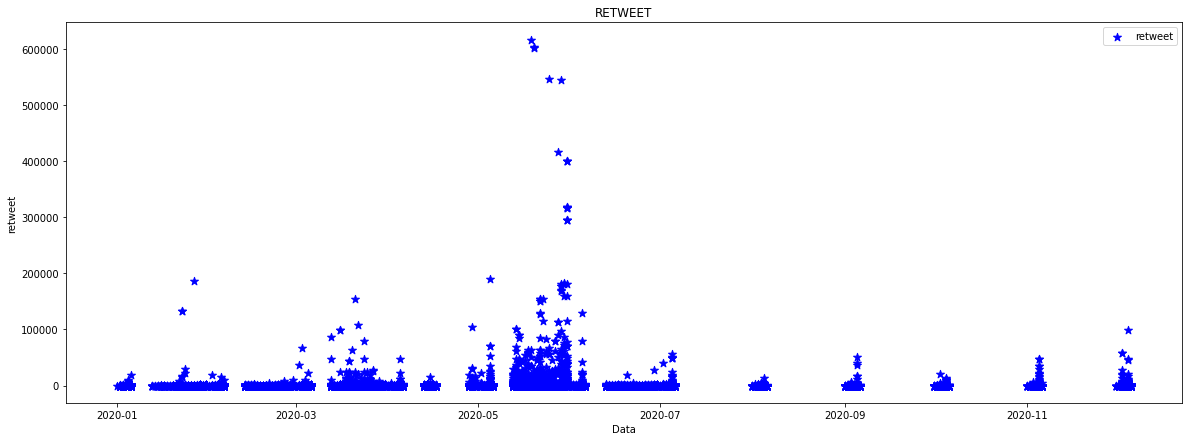

In [52]:
import matplotlib.pyplot as plt
from datetime import datetime

fig = plt.figure(figsize=(20, 7), facecolor='w')

x = df_duvidasDB['data']
y = df_duvidasDB['retweet']

plt.scatter(x,y, label='retweet', color='b', s=70, marker="*")

plt.xlabel('Data')
plt.ylabel('retweet')

plt.title('RETWEET')

plt.legend()

plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#from datetime import datetime
#
#fig = plt.figure(figsize=(20, 7), facecolor='w')
#
#x = df_duvidasDB['data']
#y = df_duvidasDB.groupby(x)['texto'].count()
#
#plt.scatter(x,y, label='texto', color='b', s=70, marker="*")
#
#plt.xlabel('Data')
#plt.ylabel('texto')
#
#plt.title('TEXTO')
#
#plt.legend()
#
#plt.show()

#FAZER GRAFICO DE DIA DA SEMANA POR HORA

#Visão Geográfica

In [53]:
df_duvidasDB['pais'].value_counts()

Brazil                        8130
Portugal                       266
United States                  113
Italy                           50
United Kingdom                  46
Spain                           34
France                          26
Republic of Mozambique          26
Canada                          25
Argentina                       17
Ireland                         15
Angola                          10
Japan                            8
Nigeria                          6
Belgium                          6
Colombia                         6
New Zealand                      6
Germany                          6
Chile                            6
Switzerland                      6
The Netherlands                  5
Peru                             5
India                            4
Bahrain                          4
Australia                        4
People's Republic of China       3
Paraguay                         3
Turkey                           3
Uruguay             

In [54]:
#Quantidade (acima de 10) de perguntas por pais
count = df_duvidasDB['pais'].value_counts().reset_index()
count.columns = ['pais', 'quantidade']
qtd = count[count.quantidade >= 10]
qtd.values

array([['Brazil', 8130],
       ['Portugal', 266],
       ['United States', 113],
       ['Italy', 50],
       ['United Kingdom', 46],
       ['Spain', 34],
       ['France', 26],
       ['Republic of Mozambique', 26],
       ['Canada', 25],
       ['Argentina', 17],
       ['Ireland', 15],
       ['Angola', 10]], dtype=object)

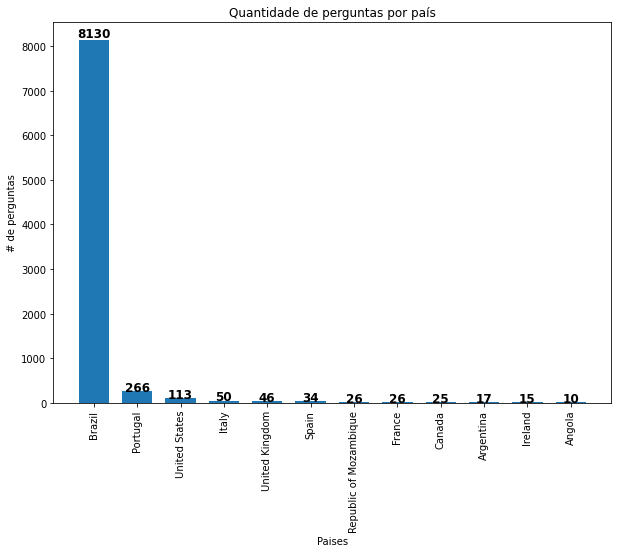

In [55]:
#Quantidade de perguntas por pais
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

paises = ['Brazil','Portugal','United States','Italy','United Kingdom','Spain','Republic of Mozambique','France','Canada','Argentina','Ireland','Angola']
dados = [8130,266,113,50,46,34,26,26,25,17,15,10]
ax.bar(x=paises, 
       height=dados,
       width=0.7)

plt.title('Quantidade de perguntas por país')
plt.xlabel('Paises')
plt.ylabel('# de perguntas')
plt.xticks(rotation=90)
#plt.annotate('Mais perguntas', xy=(22, 27000), xytext=(16, 27000), arrowprops=dict(facecolor='black'))

for index,data in enumerate(dados):
    plt.text(x=index, y =data*1.01, s=data , horizontalalignment='center', fontweight='bold', fontdict=dict(fontsize=12))

plt.show();

#FAZER GRAFICO DE LUGAR E PAIS POR MES E POR QUANT. DE TWEETS